# Data Preprocessing for Machine Learning: Olist's Public E-Commerce Dataset  



```
D.A. Anderson 2022
```



---



#1. Import python libraries

In [ ]:
import pandas as pd 
from pandas.api.types import is_object_dtype
from sklearn.preprocessing import StandardScaler
import time
import gc

# 2. Import files: Olist

In [ ]:
ORDERITEMS=pd.read_csv('/content/drive/MyDrive/newolist/olist_order_items_dataset.csv')
ORDERS=pd.read_csv('/content/drive/MyDrive/newolist/olist_orders_dataset.csv')
SELLERS=pd.read_csv('/content/drive/MyDrive/newolist/olist_sellers_dataset.csv')
CUSTOMERS=pd.read_csv('/content/drive/MyDrive/newolist/olist_customers_dataset.csv')
PRODUCTS=pd.read_csv('/content/drive/MyDrive/newolist/olist_products_dataset.csv')
GEO=pd.read_csv('/content/drive/MyDrive/newolist/olist_geolocation_dataset.csv')
PAYMENTS=pd.read_csv('/content/drive/MyDrive/newolist/olist_order_payments_dataset.csv')

# 3. Merge on shared columns in order

In [ ]:
print('There are '+ str(len(ORDERS['order_id'].unique())) + ' orders in the dataset.')

There are 99441 orders in the dataset.


In [ ]:
#ORDER ITEMS+SELLERS

ORDERITEMS_SELLERS=pd.merge(ORDERITEMS, SELLERS, on="seller_id")

#+ORDERS

ORDERS_ORDERITEMS_SELLERS=pd.merge(ORDERITEMS_SELLERS, ORDERS, on="order_id")

#+PAYMENTS

ORDERS_ORDERITEMS_SELLERS_PAYMENTS=pd.merge(ORDERS_ORDERITEMS_SELLERS, PAYMENTS, on="order_id")

#+PRODUCTS

ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS=pd.merge(ORDERS_ORDERITEMS_SELLERS_PAYMENTS, PRODUCTS, on="product_id")

#+CUSTOMERS

ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS_CUSTOMERS=pd.merge(ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS, CUSTOMERS, on="customer_id")

#+GEO: insufficient Colab resources to merge

#ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS_CUSTOMERS['geolocation_city']=ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS_CUSTOMERS['customer_city']


# 4. List all variables

In [ ]:
pd.DataFrame(pd.Series(list(ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS_CUSTOMERS.columns)),columns=['VARIABLES'])

,VARIABLES
0,order_id
1,order_item_id
2,product_id
3,seller_id
4,shipping_limit_date
5,price
6,freight_value
7,seller_zip_code_prefix
8,seller_city
9,seller_state


#5. Convert estimated X actual delivery dates to datetime objects

In [ ]:
DELIVEREDDATE = pd.to_datetime(ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS_CUSTOMERS['order_delivered_customer_date'])
ESTDELIVEREDDATE = pd.to_datetime(ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS_CUSTOMERS['order_estimated_delivery_date'])
DELIVEREDDATE

0        2017-09-20 23:43:48
1        2017-07-13 20:39:29
2        2018-06-04 18:34:26
3        2017-08-09 21:26:33
4        2017-08-24 20:04:21
                 ...        
117596   2017-05-24 10:52:43
117597   2017-08-17 17:47:55
117598   2018-08-15 14:57:50
117599   2018-04-20 17:48:39
117600   2018-04-20 17:48:39
Name: order_delivered_customer_date, Length: 117601, dtype: datetime64[ns]

#6. Calculate days late

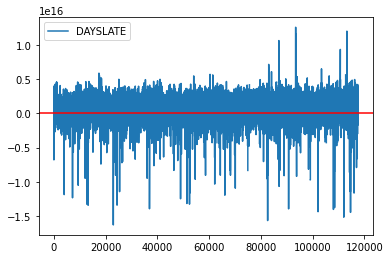

In [ ]:
ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS_CUSTOMERS['DAYSLATE']=ESTDELIVEREDDATE-DELIVEREDDATE
ax=pd.DataFrame(ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS_CUSTOMERS['DAYSLATE'])
ax=ax.plot()
ax.axhline(0, c='r')

Sorted:

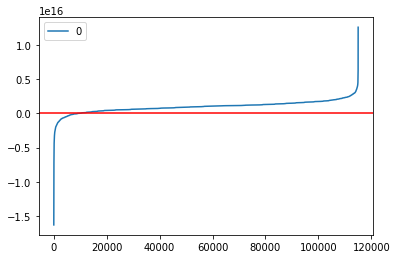

In [ ]:
ax=pd.DataFrame(ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS_CUSTOMERS['DAYSLATE'].sort_values().values)
ax=ax.plot()
ax.axhline(0, c='r')

#7. Sort the data by Purchase Order Timestamp

In [ ]:
ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS_CUSTOMERS=ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS_CUSTOMERS.sort_values(by='order_purchase_timestamp')
ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS_CUSTOMERS.index=ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS_CUSTOMERS['order_purchase_timestamp']

In [ ]:
df=ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS_CUSTOMERS
df=df.dropna()
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,DAYSLATE
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-03 09:44:50,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,522620dcb18a6b31cd7bdf73665113a9,2016-10-21 16:27:20,29.90,15.56,85801,cascavel,PR,...,3.0,300.0,16.0,16.0,16.0,32ea3bdedab835c3aa6cb68ce66565ef,4106,sao paulo,SP,0 days 09:57:47
2016-10-03 16:56:50,be5bc2f0da14d8071e2d45451ad119d9,1,fd7fd78fd3cbc1b0a6370a7909c0a629,f09b760d23495ac9a7e00d29b769007c,2016-10-21 16:33:46,21.90,17.19,15802,catanduva,SP,...,1.0,400.0,16.0,16.0,16.0,2f64e403852e6893ae37485d5fcacdaf,98280,panambi,RS,10 days 05:40:22
2016-10-03 21:01:41,65d1e226dfaeb8cdc42f665422522d14,1,9c7bdf67b06b419aefb93cfdfc96c55d,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21.50,14.11,5571,sao paulo,SP,...,1.0,476.0,17.0,14.0,14.0,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,16 days 13:01:26
2016-10-03 21:13:36,a41c8759fbe7aab36ea07e038b2d4465,1,b72b39418216e944bb34e35f4d3ea8c7,45d33f715e24d15a6ccf5c17b3a23e3c,2016-10-21 16:18:26,36.49,17.24,18015,sorocaba,SP,...,1.0,767.0,26.0,8.0,20.0,61db744d2f835035a5625b59350c6b63,90040,porto alegre,RS,25 days 13:01:53
2016-10-03 22:06:03,d207cc272675637bfed0062edffd0818,1,107177bf61755f05c604fe57e02467d6,cca3071e3e9bb7d12640c9fbe2301306,2016-10-21 16:23:06,119.90,13.56,14940,ibitinga,SP,...,1.0,2050.0,40.0,11.0,34.0,8d3a54507421dbd2ce0a1d58046826e0,13185,hortolandia,SP,22 days 12:52:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-29 14:18:23,0b223d92c27432930dfe407c6aea3041,2,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,82400,curitiba,PR,...,1.0,13550.0,48.0,49.0,49.0,5c58de6fb80e93396e2f35642666b693,80045,curitiba,PR,4 days 07:35:05
2018-08-29 14:18:23,0b223d92c27432930dfe407c6aea3041,1,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,82400,curitiba,PR,...,1.0,13550.0,48.0,49.0,49.0,5c58de6fb80e93396e2f35642666b693,80045,curitiba,PR,4 days 07:35:05
2018-08-29 14:18:28,168626408cb32af0ffaf76711caae1dc,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-08-31 14:30:23,45.90,15.39,30111,belo horizonte,MG,...,1.0,1614.0,31.0,16.0,28.0,7febafa06d9d8f232a900a2937f04338,38600,paracatu,MG,11 days 07:07:29


# 8. Create DAYSLATE

In [ ]:
df['SECONDSLATE'] = pd.to_numeric(df['DAYSLATE'].dt.seconds)
df['DAYSLATE'] = pd.to_numeric(df['DAYSLATE'].dt.days)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Final 'dayslate' is NUMBER OF DAYS X 84600 (SECONDS IN A DAY) plus NUMBER OF SECONDS

In [ ]:
df['DAYSLATE'] = df['DAYSLATE']*86400+df['SECONDSLATE']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Create QUANTILE

In [ ]:
df['QUANTILE'] = pd.cut(df['DAYSLATE'], bins=13, 
                                     labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS_CUSTOMERS=df

# 9. Drop human-selected columns

In [ ]:
DROPPER=ORDERS_ORDERITEMS_SELLERS_PAYMENTS_PRODUCTS_CUSTOMERS
DROPPER=DROPPER.drop(['SECONDSLATE','product_id','order_item_id','order_status', 'customer_city', 'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','DAYSLATE','customer_unique_id', 'seller_state', 'customer_state', 'order_id', 'seller_city', 'product_category_name'], axis=1) # 'customer_id',

In [ ]:
DROPPER

,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,customer_id,order_purchase_timestamp,order_approved_at,payment_sequential,payment_type,...,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,QUANTILE
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-03 09:44:50,522620dcb18a6b31cd7bdf73665113a9,2016-10-21 16:27:20,29.90,15.56,85801,355077684019f7f60a031656bd7262b8,2016-10-03 09:44:50,2016-10-06 15:50:54,1,boleto,...,45.46,63.0,1642.0,3.0,300.0,16.0,16.0,16.0,4106,8
2016-10-03 16:56:50,f09b760d23495ac9a7e00d29b769007c,2016-10-21 16:33:46,21.90,17.19,15802,7ec40b22510fdbea1b08921dd39e63d8,2016-10-03 16:56:50,2016-10-06 16:03:44,1,boleto,...,39.09,39.0,518.0,1.0,400.0,16.0,16.0,16.0,98280,8
2016-10-03 21:01:41,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21.50,14.11,5571,70fc57eeae292675927697fe03ad3ff5,2016-10-03 21:01:41,2016-10-04 10:18:57,1,credit_card,...,35.61,25.0,823.0,1.0,476.0,17.0,14.0,14.0,22770,8
2016-10-03 21:13:36,45d33f715e24d15a6ccf5c17b3a23e3c,2016-10-21 16:18:26,36.49,17.24,18015,6f989332712d3222b6571b1cf5b835ce,2016-10-03 21:13:36,2016-10-05 03:11:49,1,boleto,...,53.73,39.0,141.0,1.0,767.0,26.0,8.0,20.0,90040,9
2016-10-03 22:06:03,cca3071e3e9bb7d12640c9fbe2301306,2016-10-21 16:23:06,119.90,13.56,14940,b8cf418e97ae795672d326288dfab7a7,2016-10-03 22:06:03,2016-10-04 10:28:07,1,credit_card,...,133.46,55.0,130.0,1.0,2050.0,40.0,11.0,34.0,13185,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-29 14:18:23,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,82400,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:23,2018-08-29 14:31:07,1,credit_card,...,510.96,44.0,112.0,1.0,13550.0,48.0,49.0,49.0,80045,8
2018-08-29 14:18:23,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,82400,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:23,2018-08-29 14:31:07,1,credit_card,...,510.96,44.0,112.0,1.0,13550.0,48.0,49.0,49.0,80045,8
2018-08-29 14:18:28,2a84855fd20af891be03bc5924d2b453,2018-08-31 14:30:23,45.90,15.39,30111,6e353700bc7bcdf6ebc15d6de16d7002,2018-08-29 14:18:28,2018-08-29 14:30:23,1,voucher,...,61.29,26.0,394.0,1.0,1614.0,31.0,16.0,28.0,38600,8


# 10.a. Convert datetime variables , b. astype 'QUANTILE' variable, c. dropna()
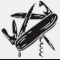

In [ ]:
import datetime
DROPPER['shipping_limit_date']=pd.to_datetime(DROPPER['shipping_limit_date'], infer_datetime_format=True).apply(lambda x : (x-datetime.datetime(1970,1,1)).total_seconds()).apply(lambda x: '%.5f' % x).astype('float32')
DROPPER['order_purchase_timestamp']=pd.to_datetime(DROPPER['order_purchase_timestamp'], infer_datetime_format=True).apply(lambda x : (x-datetime.datetime(1970,1,1)).total_seconds()).apply(lambda x: '%.5f' % x).astype('float32')
DROPPER['order_approved_at']=pd.to_datetime(DROPPER['order_approved_at'], infer_datetime_format=True).apply(lambda x : (x-datetime.datetime(1970,1,1)).total_seconds()).apply(lambda x: '%.5f' % x).astype('float32')

DROPPER

,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,customer_id,order_purchase_timestamp,order_approved_at,payment_sequential,payment_type,...,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,QUANTILE
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-03 09:44:50,522620dcb18a6b31cd7bdf73665113a9,1.477067e+09,29.90,15.56,85801,355077684019f7f60a031656bd7262b8,1.475488e+09,1.475769e+09,1,boleto,...,45.46,63.0,1642.0,3.0,300.0,16.0,16.0,16.0,4106,8
2016-10-03 16:56:50,f09b760d23495ac9a7e00d29b769007c,1.477068e+09,21.90,17.19,15802,7ec40b22510fdbea1b08921dd39e63d8,1.475514e+09,1.475770e+09,1,boleto,...,39.09,39.0,518.0,1.0,400.0,16.0,16.0,16.0,98280,8
2016-10-03 21:01:41,ed49da7cadefc454d6a67de249eab240,1.477067e+09,21.50,14.11,5571,70fc57eeae292675927697fe03ad3ff5,1.475528e+09,1.475576e+09,1,credit_card,...,35.61,25.0,823.0,1.0,476.0,17.0,14.0,14.0,22770,8
2016-10-03 21:13:36,45d33f715e24d15a6ccf5c17b3a23e3c,1.477067e+09,36.49,17.24,18015,6f989332712d3222b6571b1cf5b835ce,1.475529e+09,1.475637e+09,1,boleto,...,53.73,39.0,141.0,1.0,767.0,26.0,8.0,20.0,90040,9
2016-10-03 22:06:03,cca3071e3e9bb7d12640c9fbe2301306,1.477067e+09,119.90,13.56,14940,b8cf418e97ae795672d326288dfab7a7,1.475532e+09,1.475577e+09,1,credit_card,...,133.46,55.0,130.0,1.0,2050.0,40.0,11.0,34.0,13185,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-29 14:18:23,67bf6941ba2f1fa1d02c375766bc3e53,1.535726e+09,209.00,46.48,82400,e60df9449653a95af4549bbfcb18a6eb,1.535552e+09,1.535553e+09,1,credit_card,...,510.96,44.0,112.0,1.0,13550.0,48.0,49.0,49.0,80045,8
2018-08-29 14:18:23,67bf6941ba2f1fa1d02c375766bc3e53,1.535726e+09,209.00,46.48,82400,e60df9449653a95af4549bbfcb18a6eb,1.535552e+09,1.535553e+09,1,credit_card,...,510.96,44.0,112.0,1.0,13550.0,48.0,49.0,49.0,80045,8
2018-08-29 14:18:28,2a84855fd20af891be03bc5924d2b453,1.535726e+09,45.90,15.39,30111,6e353700bc7bcdf6ebc15d6de16d7002,1.535552e+09,1.535553e+09,1,voucher,...,61.29,26.0,394.0,1.0,1614.0,31.0,16.0,28.0,38600,8


In [ ]:
THISISINT=['QUANTILE']

In [ ]:
for i in THISISINT:
  DROPPER[i]=DROPPER[i].astype('int32')
  DROPPER=DROPPER.dropna()

# Updated see all variables

In [ ]:
DROPPER.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113390 entries, 2016-10-03 09:44:50 to 2018-08-29 15:00:37
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   seller_id                   113390 non-null  object 
 1   shipping_limit_date         113390 non-null  float32
 2   price                       113390 non-null  float64
 3   freight_value               113390 non-null  float64
 4   seller_zip_code_prefix      113390 non-null  int64  
 5   customer_id                 113390 non-null  object 
 6   order_purchase_timestamp    113390 non-null  float32
 7   order_approved_at           113390 non-null  float32
 8   payment_sequential          113390 non-null  int64  
 9   payment_type                113390 non-null  object 
 10  payment_installments        113390 non-null  int64  
 11  payment_value               113390 non-null  float64
 12  product_name_lenght         113390 non-null  f

#Determine if column dtype = object

In [ ]:
LISTR=['COLUMN LIST']

for i in DROPPER.columns:
  if is_object_dtype(DROPPER[i]) is True:
    print(i +'.  IT IS AN OBJECT')
    LISTR=LISTR+list(pd.Series(i))

LISTR=LISTR[1:]

seller_id.  IT IS AN OBJECT
customer_id.  IT IS AN OBJECT
payment_type.  IT IS AN OBJECT


In [ ]:
LISTR

['seller_id', 'customer_id', 'payment_type']

# One-hot encoding on object columns

In [ ]:
DROPPER=DROPPER[-int(len(DROPPER)*.1):]

KEEPR=DROPPER[DROPPER.columns[DROPPER.columns.isin(LISTR)]]

KEEPR=pd.get_dummies(KEEPR)

# Standardize all numeric columns

In [ ]:
time.sleep(10)
gc.collect()

for i in LISTR:
  DROPPER=DROPPER.drop(i, axis=1)
THROWR=DROPPER

In [ ]:
scaler = StandardScaler()
standardized = scaler.fit_transform(THROWR.dropna())
BREWR=pd.DataFrame(standardized)
BREWR.index=THROWR.dropna().index
BREWR.columns=THROWR.dropna().columns
BREWR['QUANTILE']=THROWR.dropna()['QUANTILE']
BREWR


,shipping_limit_date,price,freight_value,seller_zip_code_prefix,order_purchase_timestamp,order_approved_at,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,QUANTILE
order_purchase_timestamp,,,,,,,,,,,,,,,,,,
2018-07-17 22:33:14,-1.769328,0.247741,-0.114615,-0.351728,-1.760030,-1.802156,-0.148204,1.967044,0.080460,-1.449397,-0.292269,-0.712779,-0.444121,-0.773748,-0.392508,-0.563839,-0.031527,8
2018-07-17 22:33:21,-1.654993,0.247741,-0.114615,-0.351728,-1.760030,-1.687029,-0.148204,-0.678871,0.080460,-1.449397,-0.292269,-0.712779,-0.444121,-0.773748,-0.392508,-0.563839,-0.136487,8
2018-07-17 22:33:54,-1.677343,-0.102178,-0.080491,-0.699393,-1.759893,-1.802156,-0.148204,-0.678871,-0.212285,-1.857961,-0.905428,-0.137124,-0.189533,2.148496,-0.056274,-0.656118,0.115153,8
2018-07-17 22:35:28,-1.585357,1.830493,-0.098952,-0.528088,-1.759893,-1.802156,-0.148204,-0.300884,1.417612,0.184861,-0.650451,0.438532,-0.292618,-0.705789,-0.308450,-0.563839,1.391962,8
2018-07-17 22:35:29,-1.478245,0.532241,1.282237,-0.768826,-1.759893,-1.694301,-0.148204,-0.678871,0.427483,1.001990,-0.255844,-0.712779,2.168912,0.109721,1.624899,0.728068,0.978044,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-29 14:18:23,1.878472,0.451100,1.406986,2.069997,2.179949,2.148797,-0.148204,1.967044,1.462129,-0.530127,-1.093625,-0.712779,3.683941,1.332986,2.801720,2.481370,1.626786,8
2018-08-29 14:18:23,1.878472,0.451100,1.406986,2.069997,2.179949,2.148797,-0.148204,1.967044,1.462129,-0.530127,-1.093625,-0.712779,3.683941,1.332986,2.801720,2.481370,1.626786,8
2018-08-29 14:18:28,1.878472,-0.376028,-0.332226,0.195670,2.179949,2.148797,-0.148204,-0.678871,-0.462696,-2.368667,-0.665628,-0.712779,-0.044590,0.177680,0.027785,0.543510,0.224444,8


# Combine one-hot and standardized columns

In [ ]:
for i in BREWR.columns:
  KEEPR[i]=BREWR[i]
KEEPR

,seller_id_00720abe85ba0859807595bbf045a33b,seller_id_00ee68308b45bc5e2660cd833c3f81cc,seller_id_01266d4c46afa519678d16a8b683d325,seller_id_014d9a685fd57276679edd00e07089e5,seller_id_0176f73cc1195f367f7b32db1e5b3aa8,seller_id_01c97ebb5cdac52891c0ed1c37ba0012,seller_id_01fd077212124329bac32490e8ef80d9,seller_id_01fdefa7697d26ad920e9e0346d4bd1b,seller_id_0241d4d5d36f10f80c644447315af0bd,seller_id_02b72cdeb9cfcc429f1af6f4e3f3b737,...,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,QUANTILE
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,
2018-07-17 22:33:14,0,0,0,0,0,0,0,0,0,0,...,0.080460,-1.449397,-0.292269,-0.712779,-0.444121,-0.773748,-0.392508,-0.563839,-0.031527,8
2018-07-17 22:33:21,0,0,0,0,0,0,0,0,0,0,...,0.080460,-1.449397,-0.292269,-0.712779,-0.444121,-0.773748,-0.392508,-0.563839,-0.136487,8
2018-07-17 22:33:54,0,0,0,0,0,0,0,0,0,0,...,-0.212285,-1.857961,-0.905428,-0.137124,-0.189533,2.148496,-0.056274,-0.656118,0.115153,8
2018-07-17 22:35:28,0,0,0,0,0,0,0,0,0,0,...,1.417612,0.184861,-0.650451,0.438532,-0.292618,-0.705789,-0.308450,-0.563839,1.391962,8
2018-07-17 22:35:29,0,0,0,0,0,0,0,0,0,0,...,0.427483,1.001990,-0.255844,-0.712779,2.168912,0.109721,1.624899,0.728068,0.978044,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-29 14:18:23,0,0,0,0,0,0,0,0,0,0,...,1.462129,-0.530127,-1.093625,-0.712779,3.683941,1.332986,2.801720,2.481370,1.626786,8
2018-08-29 14:18:23,0,0,0,0,0,0,0,0,0,0,...,1.462129,-0.530127,-1.093625,-0.712779,3.683941,1.332986,2.801720,2.481370,1.626786,8
2018-08-29 14:18:28,0,0,0,0,0,0,0,0,0,0,...,-0.462696,-2.368667,-0.665628,-0.712779,-0.044590,0.177680,0.027785,0.543510,0.224444,8


# Create a backup .csv, import it

In [ ]:
#KEEPR.to_csv('/content/drive/MyDrive/ORDERS_ORDERITEMS_SELLERS_PRODUCTS_CUSTOMERS.csv')


In [ ]:
df=KEEPR#pd.read_csv('/content/drive/MyDrive/ORDERS_ORDERITEMS_SELLERS_PRODUCTS_CUSTOMERS.csv')
#df=df.drop('Unnamed: 0', axis=1)

In [ ]:
df

,seller_id_00720abe85ba0859807595bbf045a33b,seller_id_00ee68308b45bc5e2660cd833c3f81cc,seller_id_01266d4c46afa519678d16a8b683d325,seller_id_014d9a685fd57276679edd00e07089e5,seller_id_0176f73cc1195f367f7b32db1e5b3aa8,seller_id_01c97ebb5cdac52891c0ed1c37ba0012,seller_id_01fd077212124329bac32490e8ef80d9,seller_id_01fdefa7697d26ad920e9e0346d4bd1b,seller_id_0241d4d5d36f10f80c644447315af0bd,seller_id_02b72cdeb9cfcc429f1af6f4e3f3b737,...,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,QUANTILE
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,
2018-07-17 22:33:14,0,0,0,0,0,0,0,0,0,0,...,0.080460,-1.449397,-0.292269,-0.712779,-0.444121,-0.773748,-0.392508,-0.563839,-0.031527,8
2018-07-17 22:33:21,0,0,0,0,0,0,0,0,0,0,...,0.080460,-1.449397,-0.292269,-0.712779,-0.444121,-0.773748,-0.392508,-0.563839,-0.136487,8
2018-07-17 22:33:54,0,0,0,0,0,0,0,0,0,0,...,-0.212285,-1.857961,-0.905428,-0.137124,-0.189533,2.148496,-0.056274,-0.656118,0.115153,8
2018-07-17 22:35:28,0,0,0,0,0,0,0,0,0,0,...,1.417612,0.184861,-0.650451,0.438532,-0.292618,-0.705789,-0.308450,-0.563839,1.391962,8
2018-07-17 22:35:29,0,0,0,0,0,0,0,0,0,0,...,0.427483,1.001990,-0.255844,-0.712779,2.168912,0.109721,1.624899,0.728068,0.978044,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-29 14:18:23,0,0,0,0,0,0,0,0,0,0,...,1.462129,-0.530127,-1.093625,-0.712779,3.683941,1.332986,2.801720,2.481370,1.626786,8
2018-08-29 14:18:23,0,0,0,0,0,0,0,0,0,0,...,1.462129,-0.530127,-1.093625,-0.712779,3.683941,1.332986,2.801720,2.481370,1.626786,8
2018-08-29 14:18:28,0,0,0,0,0,0,0,0,0,0,...,-0.462696,-2.368667,-0.665628,-0.712779,-0.044590,0.177680,0.027785,0.543510,0.224444,8


# Sort the data

In [ ]:
#time.sleep(10)
#gc.collect()
#df.to_csv('/content/drive/MyDrive/BIGFILE.csv')
df=df.sort_index()

# Partition data into TRAIN, TEST, VAL

In [ ]:
time.sleep(10)
gc.collect()

TRAINLEN=int(len(df)*.66)
TESTVALLEN=int(len(df)*.33)
TRAINSAMP=df[:int(TRAINLEN*.99)]
TESTSAMP=df[:int(TESTVALLEN*.1)]
VALSAMP=df[-int(TESTVALLEN*.99):]
TRAINSAMP.to_csv('/content/drive/MyDrive/TRAINSAMP.csv')
TESTSAMP.to_csv('/content/drive/MyDrive/TESTSAMP.csv')
VALSAMP.to_csv('/content/drive/MyDrive/VALSAMP.csv')

In [ ]:
pd.read_csv('/content/drive/MyDrive/TRAINSAMP.csv')

,order_purchase_timestamp,seller_id_00720abe85ba0859807595bbf045a33b,seller_id_00ee68308b45bc5e2660cd833c3f81cc,seller_id_01266d4c46afa519678d16a8b683d325,seller_id_014d9a685fd57276679edd00e07089e5,seller_id_0176f73cc1195f367f7b32db1e5b3aa8,seller_id_01c97ebb5cdac52891c0ed1c37ba0012,seller_id_01fd077212124329bac32490e8ef80d9,seller_id_01fdefa7697d26ad920e9e0346d4bd1b,seller_id_0241d4d5d36f10f80c644447315af0bd,...,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,QUANTILE
0,2018-07-17 22:33:14,0,0,0,0,0,0,0,0,0,...,0.080460,-1.449397,-0.292269,-0.712779,-0.444121,-0.773748,-0.392508,-0.563839,-0.031527,8
1,2018-07-17 22:33:21,0,0,0,0,0,0,0,0,0,...,0.080460,-1.449397,-0.292269,-0.712779,-0.444121,-0.773748,-0.392508,-0.563839,-0.136487,8
2,2018-07-17 22:33:54,0,0,0,0,0,0,0,0,0,...,-0.212285,-1.857961,-0.905428,-0.137124,-0.189533,2.148496,-0.056274,-0.656118,0.115153,8
3,2018-07-17 22:35:28,0,0,0,0,0,0,0,0,0,...,1.417612,0.184861,-0.650451,0.438532,-0.292618,-0.705789,-0.308450,-0.563839,1.391962,8
4,2018-07-17 22:35:29,0,0,0,0,0,0,0,0,0,...,0.427483,1.001990,-0.255844,-0.712779,2.168912,0.109721,1.624899,0.728068,0.978044,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,2018-08-10 18:50:46,0,0,0,0,0,0,0,0,0,...,0.236100,-0.325844,0.480250,-0.137124,-0.361341,0.109721,0.364019,-0.656118,1.612405,8
7404,2018-08-10 18:58:47,0,0,0,0,0,0,0,0,0,...,-0.132496,0.184861,-0.667146,-0.712779,-0.455054,-0.637830,-0.224391,-0.840676,-0.560557,8
7405,2018-08-10 19:28:03,0,0,0,0,0,0,0,0,0,...,-0.449512,-0.223703,-1.019257,-0.137124,-0.439435,-0.230075,-0.644684,-0.287002,-0.152154,8
7406,2018-08-10 19:29:10,0,0,0,0,0,0,0,0,0,...,-0.399644,-0.938691,0.065913,-0.712779,-0.189533,-0.841707,0.027785,-0.563839,-0.886501,8
